# Crowdfunding Visual Data Analysis

# Table of contents
1. [Introduction](#introduction)
2. [Descriptive Statistics](#descriptivestatistics)
3. [Univariate Exploration](#univariateexploration)

# Introduction <a name="introduction"></a>
Some introduction text, formatted in heading 2 style


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# style settings
# uncoment the below to avoid collapsing of dataframes
# pd.set_option('display.max_rows', 2500)
# pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', -1)

## Launch data and prepare for analysis

In [5]:
file_name =  './data/kickstarter_master{}.csv'
master_df = pd.concat([pd.read_csv(file_name.format(i)) for i in range(1,4)])
master_df.reset_index(drop=True, inplace=True)
master_df.head()

,project_id,project_name,url,blurb,category,subcategory,image,slug,created_at,launched_at,...,staff_pick,currency,goal_real,goal_current_usd,goal_hist_usd,pledged_real,pledged_current_usd,pledged_hist_usd,current_fx_rate(usd),hist_exchange_rate(usd)
0,2581325,OMNI - Intelligent Construction Robots (Canceled),https://www.kickstarter.com/projects/omnirobo/omni-intelligent-construction-robots,"An intelligent, heavy terrain construction robot.",Technology,Robots,https://ksr-ugc.imgix.net/assets/012/911/440/fa9bf5eab584bcf892d417f56b32f7de_original.JPG?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1467297272&auto=format&frame=1&q=92&s=ed82003db11fc84d4f04d10c67bccd58,omni-intelligent-construction-robots,2016-06-30 11:18:15,2016-07-05 20:51:08,...,False,SEK,39250000.0,4.099887e+06,4.595847e+06,0.0,0.000000,0.000000,9.573433,8.540320
1,1009980,Diamond's 2015 Cosplay Calendar,https://www.kickstarter.com/projects/drrysdiamonds/dr-rys-diamonds,"Twelve months of gorgeous local Brisbane models,cosplaying as superheroes!",Publishing,Calendars,https://ksr-ugc.imgix.net/assets/011/699/764/4c0071a29260f73cefa1cc043d02f52e_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1463686963&auto=format&frame=1&q=92&s=e427f6f77cf3ba0dc699852c8f2344cd,dr-rys-diamonds,2014-05-06 12:24:56,2014-05-11 09:34:37,...,False,AUD,1000.0,6.903425e+02,9.369899e+02,165.0,106.633168,144.731353,1.448556,1.067247
2,3397649,The Lady In RED,https://www.kickstarter.com/projects/1911329541/the-lady-in-red,This is a short film about married Marines who are picked up by an older couple as they are hitch hiking home and what happens.,Film & Video,Drama,https://ksr-ugc.imgix.net/assets/021/475/491/1f51ff654672a21e6ec85e5c6f4eeece_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1528204710&auto=format&frame=1&q=92&s=b6be61cf6f63016fd14cd9208460c149,the-lady-in-red,2018-06-05 12:53:13,2018-06-05 19:00:38,...,False,USD,5000.0,5.000000e+03,5.000000e+03,1.0,1.000000,1.000000,1.000000,1.000000
3,3216003,MEMORIA PERDIDA: Spain's Lost Memory 1936-1975,https://www.kickstarter.com/projects/miquelgonzalez/memoria-perdida-recovering-spains-lost-memory-1936,"A photo book tracing the sites of Spain's 114,000 disappeared, who lie still in unmarked mass-graves along roads, fields or in ravines.",Photography,Photobooks,https://ksr-ugc.imgix.net/assets/019/174/183/64b643192d4295d091002c1f0fe2c5ea_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1521408385&auto=format&frame=1&q=92&s=69fd82a6aaf3f374ffa16f8d99c6b0d1,memoria-perdida-recovering-spains-lost-memory-1936,2017-11-11 11:39:17,2018-02-15 10:39:34,...,False,EUR,9500.0,1.062765e+04,1.169355e+04,9626.0,13329.000623,14665.832544,0.893895,0.812414
4,3399126,THE ROOT OF PERFECTION,https://www.kickstarter.com/projects/2054701261/the-root-of-perfection,"""The Root of Perfection"" is a science-fiction dramedy about the want and need for perfection. Written & directed by a 16 year old.",Film & Video,Science Fiction,https://ksr-ugc.imgix.net/assets/021/749/712/6247ecebf162ce3520ffa97d832a2367_original.JPG?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1530332315&auto=format&frame=1&q=92&s=949e505e1cf2cf294462930661d065fb,the-root-of-perfection,2018-06-07 03:21:12,2018-06-30 22:44:37,...,False,USD,3500.0,3.500000e+03,3.500000e+03,3663.5,3663.500000,3663.500000,1.000000,1.000000


In [13]:
# To category
master_df['country'] = master_df['country'].astype('category')
master_df['currency'] = master_df['currency'].astype('category')
master_df['status'] = master_df['status'].astype('category')
master_df['category'] = master_df['category'].astype('category')
master_df['subcategory'] = master_df['subcategory'].astype('category')

# to date time
master_df[['created_at', 'launched_at', 'state_changed_at', 'deadline', 'last_update_at']] = master_df[['created_at', 'launched_at', 'state_changed_at', 'deadline', 'last_update_at']].apply(pd.to_datetime)

In [19]:
# engineer variable to asses funding duration
master_df['duration'] = master_df['deadline'] - master_df['launched_at']
master_df[['launched_at', 'deadline', 'duration']].sample(10)

,launched_at,deadline,duration
169085,2016-09-19 15:59:18,2016-11-07 16:54:00,49 days 00:54:42
52541,2015-09-23 13:47:56,2015-10-23 13:47:56,30 days 00:00:00
73226,2015-11-08 03:48:36,2015-12-09 00:30:00,30 days 20:41:24
49984,2018-01-22 20:32:17,2018-02-21 20:32:17,30 days 00:00:00
77902,2018-04-24 05:56:50,2018-05-15 05:56:50,21 days 00:00:00
34008,2015-05-01 04:05:42,2015-06-01 03:54:00,30 days 23:48:18
48072,2015-07-07 01:41:45,2015-08-06 01:41:45,30 days 00:00:00
149803,2014-11-11 04:33:19,2014-12-11 04:33:19,30 days 00:00:00
159310,2014-07-28 19:34:46,2014-08-27 19:34:46,30 days 00:00:00
29805,2015-03-17 18:52:22,2015-04-16 18:52:22,30 days 00:00:00


In [32]:
master_df[['created_at', 'launched_at', 'state_changed_at', 'deadline', 'last_update_at', 'duration']]

,created_at,launched_at,state_changed_at,deadline,last_update_at,duration
0,2016-06-30 11:18:15,2016-07-05 20:51:08,2016-07-15 06:09:53,2016-08-04 20:51:08,2016-06-30 11:18:15,30 days 00:00:00
1,2014-05-06 12:24:56,2014-05-11 09:34:37,2014-06-10 09:34:37,2014-06-10 09:34:37,2015-03-09 15:44:16,30 days 00:00:00
2,2018-06-05 12:53:13,2018-06-05 19:00:38,2018-07-06 19:00:38,2018-07-06 19:00:38,2018-06-05 12:53:13,31 days 00:00:00
3,2017-11-11 11:39:17,2018-02-15 10:39:34,2018-03-19 11:00:00,2018-03-19 11:00:00,2018-07-01 21:55:04,32 days 00:20:26
4,2018-06-07 03:21:12,2018-06-30 22:44:37,2018-07-26 06:30:01,2018-07-26 06:30:00,2018-06-07 03:21:12,25 days 07:45:23
5,2017-10-26 10:30:44,2017-11-13 18:02:06,2017-12-18 18:02:06,2017-12-18 18:02:06,2017-12-20 11:16:09,35 days 00:00:00
6,2014-09-05 16:23:34,2014-09-17 19:00:32,2014-10-17 19:00:32,2014-10-17 19:00:32,2015-03-09 15:44:34,30 days 00:00:00
7,2018-09-05 13:50:28,2018-09-12 20:41:26,2018-10-22 20:41:27,2018-10-22 20:41:26,2018-09-05 13:50:28,40 days 00:00:00
8,2018-06-13 21:22:10,2018-07-02 15:26:27,2018-07-30 21:00:03,2018-07-30 21:00:00,2018-07-30 21:02:11,28 days 05:33:33
9,2014-05-16 14:43:36,2014-05-27 14:03:00,2014-06-26 14:03:00,2014-06-26 14:03:00,2015-03-09 15:44:17,30 days 00:00:00



# Descriptive Statistics <a name="descriptivestatistics"></a>
Some introduction text, formatted in heading 2 style

In [20]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178882 entries, 0 to 178881
Data columns (total 34 columns):
project_id                 178882 non-null int64
project_name               178882 non-null object
url                        178882 non-null object
blurb                      178882 non-null object
category                   178882 non-null category
subcategory                178882 non-null category
image                      178882 non-null object
slug                       178882 non-null object
created_at                 178882 non-null datetime64[ns]
launched_at                178882 non-null datetime64[ns]
deadline                   178882 non-null datetime64[ns]
state_changed_at           178882 non-null datetime64[ns]
last_update_at             178882 non-null datetime64[ns]
status                     178882 non-null category
creator_id                 178882 non-null int64
creator_name               178881 non-null object
country                    178873 non-null ca

In [21]:
master_df.describe()

,project_id,creator_id,backers_count,goal_real,goal_current_usd,goal_hist_usd,pledged_real,pledged_current_usd,pledged_hist_usd,current_fx_rate(usd),hist_exchange_rate(usd),duration
count,1.788820e+05,1.788820e+05,178882.000000,1.788820e+05,1.788820e+05,1.788820e+05,1.788820e+05,1.788820e+05,1.788820e+05,178882.000000,178882.000000,178882
mean,2.100918e+06,1.074554e+09,133.035493,5.273863e+04,4.384505e+04,4.484346e+04,1.557759e+04,1.149526e+04,1.168967e+04,1.459641,1.435317,32 days 18:49:55.724136
std,1.054805e+06,6.202155e+08,855.913465,1.248093e+06,1.149428e+06,1.183966e+06,2.785835e+05,8.214388e+04,8.315025e+04,4.480027,4.508494,11 days 19:37:11.072686
min,1.900000e+01,3.000000e+00,0.000000,1.000000e-02,1.000000e-02,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.789470,0.582605,1 days 00:00:00
25%,1.291359e+06,5.374859e+08,3.000000,1.500000e+03,1.500000e+03,1.500000e+03,7.200000e+01,6.100000e+01,6.300000e+01,1.000000,1.000000,29 days 23:00:00
50%,2.217290e+06,1.073594e+09,23.000000,5.000000e+03,5.000000e+03,5.000000e+03,1.270000e+03,1.195000e+03,1.220000e+03,1.000000,1.000000,30 days 00:00:00
75%,3.042017e+06,1.612539e+09,80.000000,1.500000e+04,1.342440e+04,1.413008e+04,6.095000e+03,5.775000e+03,5.900000e+03,1.000000,1.000000,34 days 15:30:08.250000
max,3.710988e+06,2.147483e+09,105857.000000,1.000000e+08,1.266673e+08,1.500993e+08,8.103074e+07,8.596475e+06,8.596475e+06,109.600429,113.940122,93 days 02:32:04


# Univariate Exploration <a name='univariateexploration'></a>
Let's start our exploration by looking at the main domain of interest: How successful were projects? 


In [31]:
master_df.status.value_counts()

successful    95452
failed        74213
canceled      8587 
suspended     630  
Name: status, dtype: int64

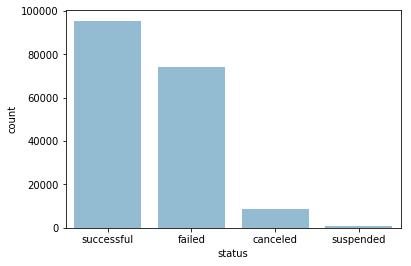

In [30]:
base_color = sns.color_palette("Blues_r")[3]
# create ordering
order = master_df.status.value_counts().index

sns.countplot(data=master_df, x='status', color=base_color, order=order);